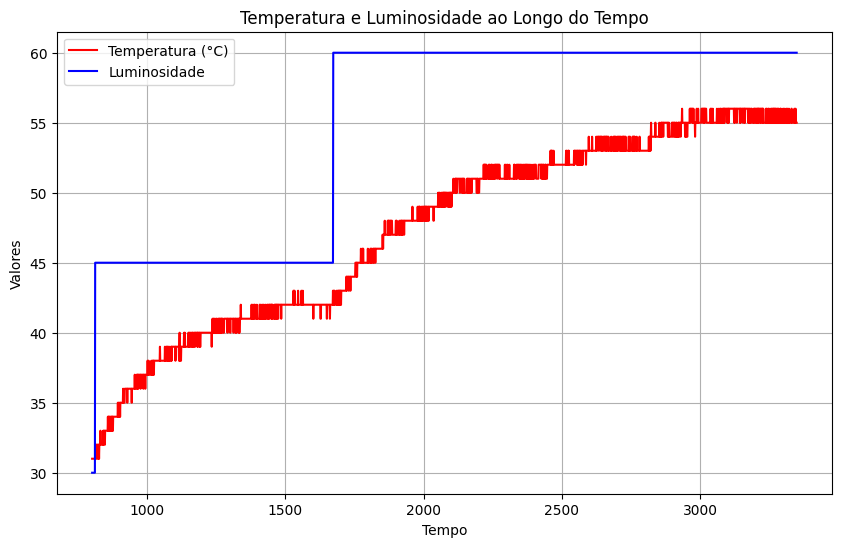

In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregando os dados do arquivo txt, assumindo que não há cabeçalho
caminho_do_arquivo = 'input.txt'
# É importante que o separador esteja correto. Vamos tentar ler o arquivo considerando diferentes configurações
dados = pd.read_csv(caminho_do_arquivo, delimiter='; ', engine='python', header=None, names=['T', 'Temp', 'Luminosidade'])



# Processando os dados
dados['T'] = dados['T'].str.replace('T: ', '').astype(int)
dados['Temp'] = dados['Temp'].str.replace('Temp: ', '').astype(float)
dados['Luminosidade'] = dados['Luminosidade'].str.replace('Luminosidade: ', '').astype(float)

# dados de t:1700 a 1800

# Plotando o gráfico com Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='T', y='Temp', data=dados, label='Temperatura (°C)', color='red')
sns.lineplot(x='T', y='Luminosidade', data=dados, label='Luminosidade', color='blue')

plt.xlabel('Tempo')
plt.ylabel('Valores')
plt.title('Temperatura e Luminosidade ao Longo do Tempo')
plt.legend()
plt.grid(True)

plt.show()

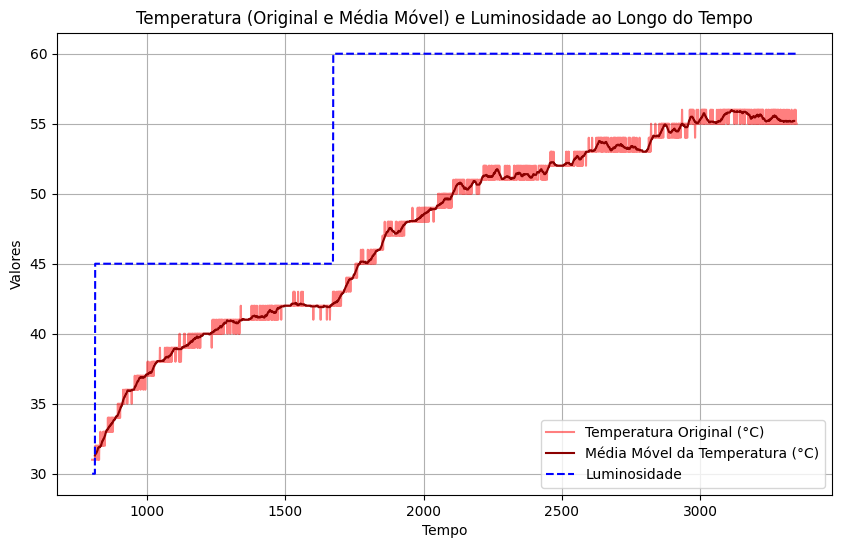

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assumindo que você já tem o DataFrame 'dados' conforme descrito anteriormente

# Definindo o tamanho da janela para a média móvel da temperatura
tamanho_janela = 20  # Você pode ajustar esse valor conforme necessário para obter a suavização desejada

# Calculando a média móvel da temperatura
dados['Temp_Media_Movel'] = dados['Temp'].rolling(window=tamanho_janela, center=True).mean()

# Plotando os dados originais de temperatura e luminosidade junto com a média móvel da temperatura
plt.figure(figsize=(10, 6))

# Temperatura original
sns.lineplot(x='T', y='Temp', data=dados, label='Temperatura Original (°C)', color='red', alpha=0.5)

# Média móvel da temperatura
sns.lineplot(x='T', y='Temp_Media_Movel', data=dados, label='Média Móvel da Temperatura (°C)', color='darkred')

# Luminosidade (mantida sem alteração)
sns.lineplot(x='T', y='Luminosidade', data=dados, label='Luminosidade', color='blue', linestyle='--')

plt.xlabel('Tempo')
plt.ylabel('Valores')
plt.title('Temperatura (Original e Média Móvel) e Luminosidade ao Longo do Tempo')
plt.legend()
plt.grid(True)

plt.show()


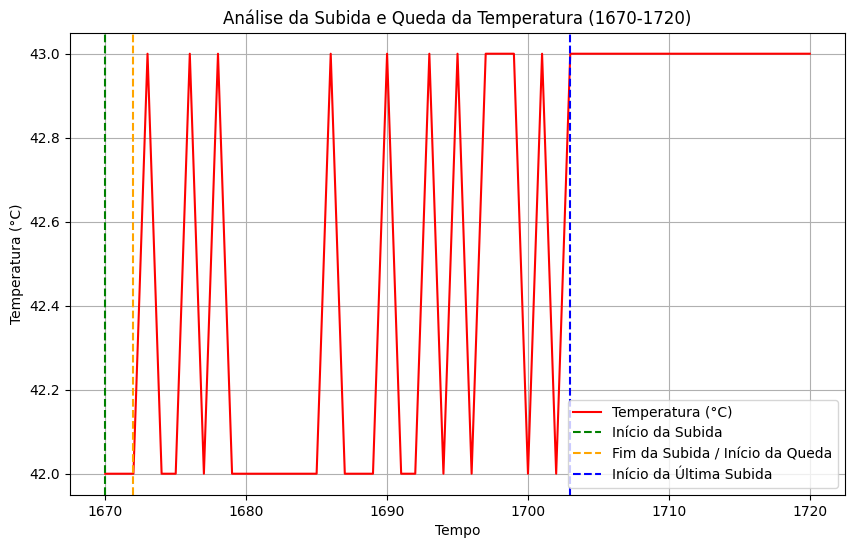

(2.0, 17.0, 31.0, 1672.0, 1703.0)

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulando 'dados' já que não tenho acesso ao DataFrame real
# dados = pd.read_csv('caminho_para_o_seu_csv.csv') # Substitua com o caminho para o seu arquivo CSV

# Substituindo o DataFrame simulado por 'filtered_df'
filtered_df = dados[(dados['T'] >= 1670) & (dados['T'] <= 1720)]

# Encontrando o índice da temperatura máxima que indicaria o pico antes de começar a cair
peak_index = filtered_df['Temp'].idxmax()

# Tempo de subida do primeiro registro até o pico
rise_start = filtered_df.iloc[0]['T']
rise_end = filtered_df.loc[peak_index-1]['T']

# Para encontrar o último ponto de subida (última variação para cima) antes da queda final
# Calculamos a diferença entre pontos consecutivos para encontrar onde a temperatura começa a cair
temperature_differences = filtered_df['Temp'].diff().fillna(0)
fall_end_indices = temperature_differences[temperature_differences < 0].index
last_rise_before_fall = fall_end_indices[-1] if len(fall_end_indices) > 0 else peak_index

# O tempo de queda seria do ponto encontrado até o último registro
fall_start = filtered_df.loc[last_rise_before_fall+1]['T']
fall_end = filtered_df.iloc[-1]['T']
time_of_fall = fall_end - fall_start

# Plotando o gráfico
plt.figure(figsize=(10, 6))

# Linha da temperatura
plt.plot(filtered_df['T'], filtered_df['Temp'], label='Temperatura (°C)', color='red')

# Marcando o início e o fim da subida e da queda
plt.axvline(x=rise_start, color='green', linestyle='--', label='Início da Subida')
plt.axvline(x=rise_end, color='orange', linestyle='--', label='Fim da Subida / Início da Queda')
plt.axvline(x=fall_start, color='blue', linestyle='--', label='Início da Última Subida')

# Ajustes finais do gráfico
plt.xlabel('Tempo')
plt.ylabel('Temperatura (°C)')
plt.title('Análise da Subida e Queda da Temperatura (1670-1720)')
plt.legend()
plt.grid(True)

plt.show()

total_of_time_passed = fall_start - rise_end
# Output the time of rise and time of fall for verification
time_of_rise, time_of_fall,total_of_time_passed , rise_end,fall_start


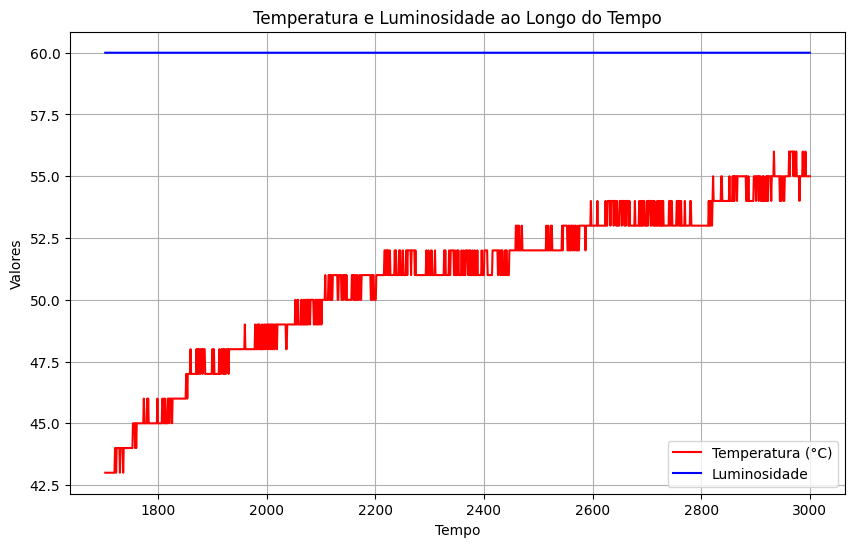

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

dados_aumento_tf = dados[(dados['T'] >= 1703.0) & (dados['T'] <= 3000)]

# Plotando o gráfico com Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='T', y='Temp', data=dados_aumento_tf, label='Temperatura (°C)', color='red')
sns.lineplot(x='T', y='Luminosidade', data=dados_aumento_tf, label='Luminosidade', color='blue')

plt.xlabel('Tempo')
plt.ylabel('Valores')
plt.title('Temperatura e Luminosidade ao Longo do Tempo')
plt.legend()
plt.grid(True)

plt.show()


In [152]:
import numpy as np

# Substitua estas linhas pelas suas colunas de dados reais
T_valores = dados_aumento_tf['T'].to_numpy()
temp_valores = dados_aumento_tf['Temp'].to_numpy()
luminosidade_valores = dados_aumento_tf['Luminosidade'].to_numpy()

# Calculando a interpolação para o valor específico de T
Temp_63_21 = np.interp(2522.83, T_valores, temp_valores)
Luminosidade_63_21 = np.interp(2522.83, T_valores, luminosidade_valores)

print(f"Temperatura para T = 2522.83: {Temp_63_21}°C")
print(f"Luminosidade para T = 2522.83: {Luminosidade_63_21}")


Temperatura para T = 2522.83: 52.82999999999993°C
Luminosidade para T = 2522.83: 60.0


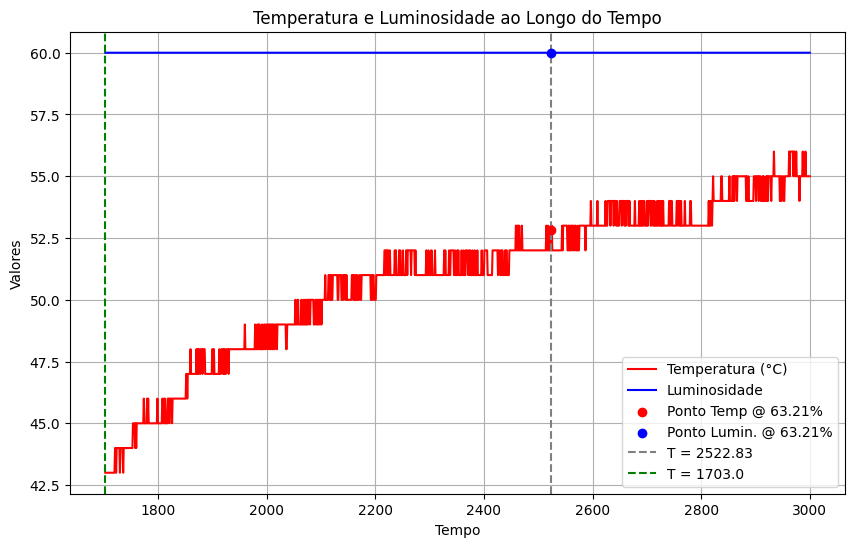

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Supondo que dados_aumento_tf seja seu DataFrame filtrado
# Substitua temp_2522_83 e luminosidade_2522_83 pelos valores interpolados ou reais correspondentes
temp_2522_83 = np.interp(2522.83, dados_aumento_tf['T'], dados_aumento_tf['Temp'])
luminosidade_2522_83 = np.interp(2522.83, dados_aumento_tf['T'], dados_aumento_tf['Luminosidade'])

# Plotando o gráfico com Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='T', y='Temp', data=dados_aumento_tf, label='Temperatura (°C)', color='red')
sns.lineplot(x='T', y='Luminosidade', data=dados_aumento_tf, label='Luminosidade', color='blue')

# Adicionando o ponto destacado para T = 2522.83
plt.scatter(2522.83, temp_2522_83, color='red', label='Ponto Temp @ 63.21%', zorder=5)
plt.scatter(2522.83, luminosidade_2522_83, color='blue', label='Ponto Lumin. @ 63.21%', zorder=5)

# faça uma linha nesse momento
plt.axvline(x=2522.83, color='gray', linestyle='--', label='T = 2522.83')

# linha momento 1703.0

plt.axvline(x=1703.0, color='green', linestyle='--', label='T = 1703.0')

#  linha momen

plt.xlabel('Tempo')
plt.ylabel('Valores')
plt.title('Temperatura e Luminosidade ao Longo do Tempo')
plt.legend()
plt.grid(True)

plt.show()


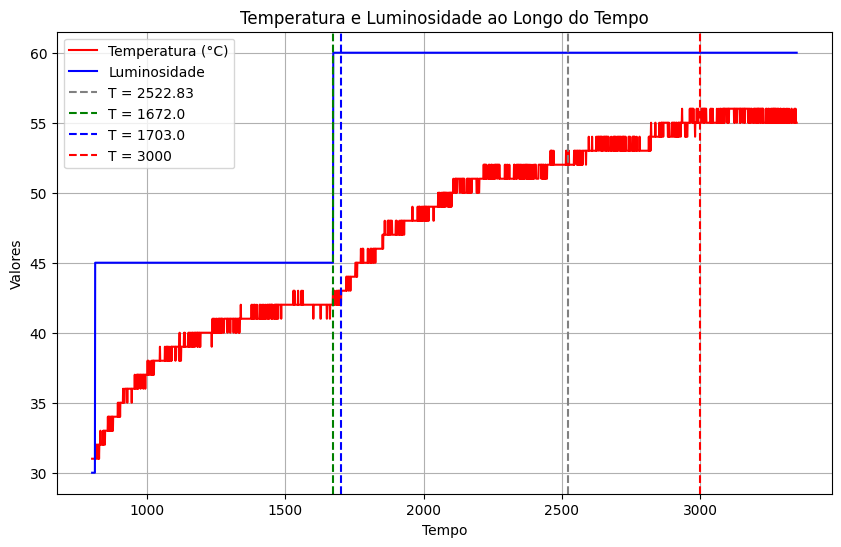

(881, 86.46666666666667)

In [167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregando os dados do arquivo txt, assumindo que não há cabeçalho
caminho_do_arquivo = 'input.txt'
# É importante que o separador esteja correto. Vamos tentar ler o arquivo considerando diferentes configurações
dados = pd.read_csv(caminho_do_arquivo, delimiter='; ', engine='python', header=None, names=['T', 'Temp', 'Luminosidade'])



# Processando os dados
dados['T'] = dados['T'].str.replace('T: ', '').astype(int)
dados['Temp'] = dados['Temp'].str.replace('Temp: ', '').astype(float)
dados['Luminosidade'] = dados['Luminosidade'].str.replace('Luminosidade: ', '').astype(float)

# dados de t:1700 a 1800

# Plotando o gráfico com Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='T', y='Temp', data=dados, label='Temperatura (°C)', color='red')
sns.lineplot(x='T', y='Luminosidade', data=dados, label='Luminosidade', color='blue')

# adicione uma linha em t = 2522.83
plt.axvline(x=2522.83, color='gray', linestyle='--', label='T = 2522.83')

# e uma linha em t = 1672.0

plt.axvline(x=1672.0, color='green', linestyle='--', label='T = 1672.0')

#  uma linha em t = 1703.0

plt.axvline(x=1703.0, color='blue', linestyle='--', label='T = 1703.0')

# linha em t = 3000

plt.axvline(x=3000, color='red', linestyle='--', label='T = 3000')


plt.xlabel('Tempo')
plt.ylabel('Valores')
plt.title('Temperatura e Luminosidade ao Longo do Tempo')
plt.legend()
plt.grid(True)

plt.show()

tal  = 2553 -1672
k=(3000-1703)/15

tal, k

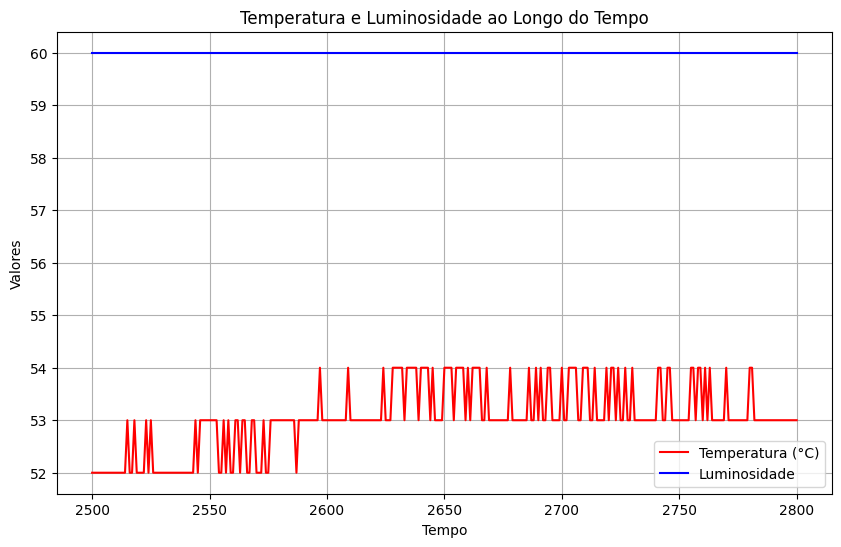

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

dados_aumento_tf = dados[(dados['T'] >= 2500) & (dados['T'] <= 2800)]

# plot

plt.figure(figsize=(10, 6))
sns.lineplot(x='T', y='Temp', data=dados_aumento_tf, label='Temperatura (°C)', color='red')
sns.lineplot(x='T', y='Luminosidade', data=dados_aumento_tf, label='Luminosidade', color='blue')

# final do plot

plt.xlabel('Tempo')
plt.ylabel('Valores')
plt.title('Temperatura e Luminosidade ao Longo do Tempo')
plt.legend()

plt.grid(True)

plt.show()

In [161]:
zigler nekels
alocao polos
ngr 

SyntaxError: invalid syntax (4174685503.py, line 1)